In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.special import ndtri
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/Leaderboard2.xlsx'

In [31]:
df = pd.read_excel(file_path)
df.head()

,Points,Tasks
0,13574,221
1,12770,202
2,12722,202
3,12382,214
4,12250,202


In [0]:
df = df.sort_values(by=['Points'], ascending=True).reset_index()

In [0]:
df['count'] = df.index + 1

In [34]:
df.head()

,index,Points,Tasks,count
0,43,0,7,1
1,42,40,25,2
2,41,80,23,3
3,40,230,25,4
4,39,400,26,5


In [0]:
n_rows = df.shape[0]

In [0]:
df['percentile_area'] = (df['count'] - 0.5)/n_rows

In [0]:
df['z_theoritical'] = ndtri(df['percentile_area'])

In [0]:
df['z_actual'] = (df['Points'] - df['Points'].mean())/df['Points'].std(ddof=0)

In [39]:
df.head()

,index,Points,Tasks,count,percentile_area,z_theoritical,z_actual
0,43,0,7,1,0.011364,-2.277988,-1.473264
1,42,40,25,2,0.034091,-1.823803,-1.464043
2,41,80,23,3,0.056818,-1.582058,-1.454821
3,40,230,25,4,0.079545,-1.408136,-1.420239
4,39,400,26,5,0.102273,-1.268707,-1.381046


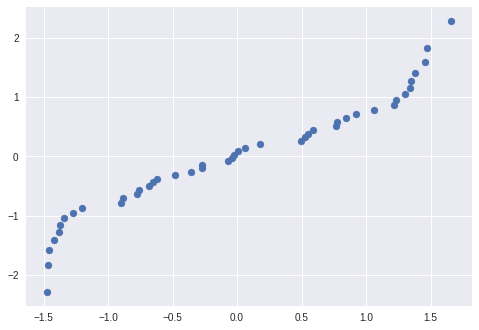

In [43]:
plt.scatter(df.z_actual, df.z_theoritical)